In [14]:
%load_ext autoreload
%autoreload 2

from scipy.interpolate import griddata
import numpy as np
from scipy.ndimage import gaussian_filter #從 scipy.ndimage 導入 gaussian_filter
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4 as nc
import h5py
from numba import jit,njit,prange
from numpy import linalg
from time import sleep
from tqdm import tqdm, trange
import torch, torch.linalg
from tqdm import tqdm
import shutil
from time import gmtime, strftime
from scipy.fft import *
import matplotlib
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal
import xarray as xr
from scipy.interpolate import *
# for latex style 
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from os import environ

environ['OMP_NUM_THREADS'] = '10'
torch.set_num_threads(16)


from scipy.spatial import distance_matrix



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
data = xr.open_dataset('/work/DATA/Satellite/CERES/SYN1deg_daily.nc')

In [16]:
clim    = data['lw_up'].groupby('time.dayofyear').mean('time')
anomaly_tmp = data['lw_up'].groupby('time.dayofyear') - clim 
lon = data['lon'] 
lat = data['lat']

anomaly = anomaly_tmp.sel(lat=slice(-15.0, 15.0))
anomaly.shape

(8888, 6, 30, 360)

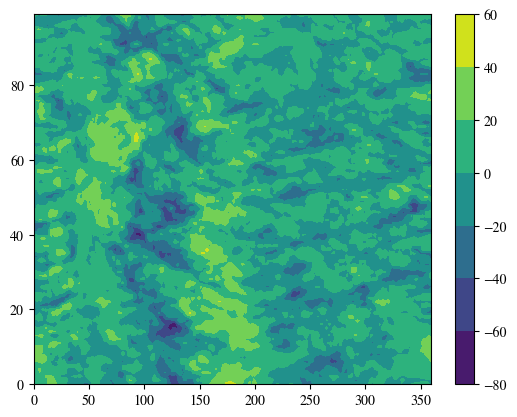

In [17]:
temp = anomaly.mean('lat') 
plt.contourf(temp[:100,0,:])
plt.colorbar()
#print(data['lev'][0])